<a href="https://colab.research.google.com/github/leonardosaeta/IMDB-comments-pre-processing/blob/main/Pre_Processing_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/MyDrive/IMDB Dataset.csv.zip'

Archive:  /content/drive/MyDrive/IMDB Dataset.csv.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import seaborn as sns

In [4]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
train, test, label_train, label_test = train_test_split(df.review, 
                                                        df.sentiment,
                                                        random_state=42)

In [7]:
print(df.sentiment.value_counts())

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [8]:
classification = df['sentiment'].replace(['negative','positive'], [0,1])

In [9]:
df['classification'] = classification

In [10]:
df.head(10)

,review,sentiment,classification
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
5,"Probably my all-time favorite movie, a story o...",positive,1
6,I sure would like to see a resurrection of a u...,positive,1
7,"This show was an amazing, fresh & innovative i...",negative,0
8,Encouraged by the positive comments about this...,negative,0
9,If you like original gut wrenching laughter yo...,positive,1


In [11]:
def text_classfication(text, text_column, classification):
  vectorization = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vectorization.fit_transform(text[text_column])
  
  train, test, label_train, label_test = train_test_split(bag_of_words, 
                                                        text[classification],
                                                        random_state=42)

  logistic_regression = LogisticRegression()
  logistic_regression.fit(train, label_train)
  return logistic_regression.score(test, label_test)

In [12]:
print(text_classfication(df, "review", "classification"))

0.652


#Word Cloud

In [13]:
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS


def negative_word_clouds(text, text_column):
  negative_reviews = text.query("sentiment == 'negative'")
  every_word = ' '.join([text for text in negative_reviews[text_column]])

  word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(every_word)

  plt.figure(figsize=(10,7))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [14]:
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS


def positive_word_clouds(text, text_column):
  positive_reviews = text.query("sentiment == 'positive'")
  every_word = ' '.join([text for text in positive_reviews[text_column]])

  word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(every_word)

  plt.figure(figsize=(10,7))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

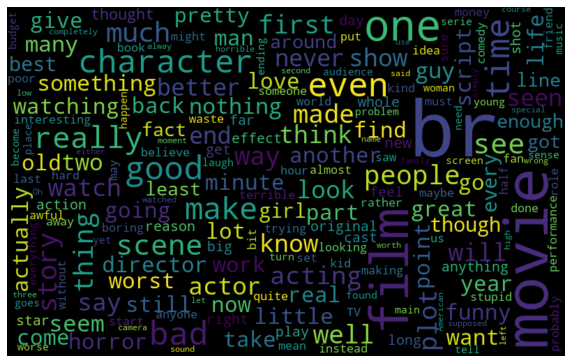

In [15]:
negative_word_clouds(df, "review")

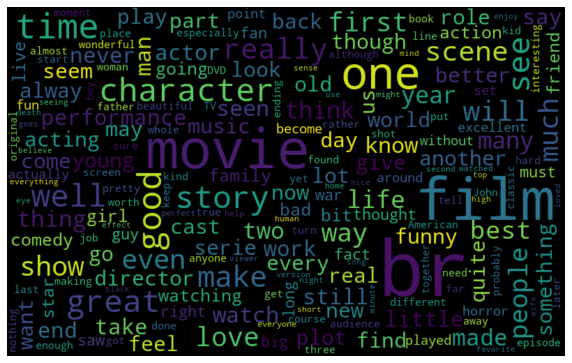

In [16]:
positive_word_clouds(df, "review")

In [17]:
space_tolken = tokenize.WhitespaceTokenizer()

In [18]:
every_word = ' '.join(text for text in df.review) 

phrase_token = space_tolken.tokenize(every_word)
frequency = nltk.FreqDist(phrase_token)

In [19]:
df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})

In [20]:
df_frequency.nlargest(columns = 'Frequency', n=10)

,Word,Frequency
2,the,568735
52,a,306960
38,and,301919
1,of,283625
64,to,261850
22,is,203056
44,in,169981
151,I,132498
7,that,126818
21,this,113726


In [21]:
def barplott(text, text_column, n):
  every_word = ' '.join(text for text in df[text_column])
  frequency = nltk.FreqDist(space_tolken.tokenize(every_word))
  df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})

  df_frequency = df_frequency.nlargest(columns = 'Frequency', n=n)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequency.nlargest(columns = 'Frequency', n=20), x="Word", y="Frequency", color="gray")
  ax.set(ylabel= "counting")
  plt.show

In [22]:
nltk.download('stopwords')

irrelevant_words = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
irrelevant_words.append('br')
irrelevant_words.append('<br />')
irrelevant_words.append('/><br')
irrelevant_words.append('/>the')

In [24]:
irrelevant_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
from string import punctuation
punc = list()
for punct in punctuation:
  punc.append(punct)

punc_stopwords = punc + irrelevant_words

In [26]:
import nltk
nltk.download('rslp')

stemmer = nltk.RSLPStemmer()


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [27]:
processes_phrase = list()

for wordss in df["review"]:
  new_phrase = list()
  wordss = wordss.lower()
  text_words = space_tolken.tokenize(wordss)
  for wordd in text_words:
    if wordd not in punc_stopwords:
      new_phrase.append(stemmer.stem(wordd)) #added stem to avoid repetitive words
  processes_phrase.append(' '.join(new_phrase))



df['processed_1'] = processes_phrase


In [28]:
df.head()

,review,sentiment,classification,processed_1
0,One of the other reviewers has mentioned that ...,positive,1,one review mentioned watching 1 oz episod hook...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful littl production. <br filming techni...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend tim hot summ weeke...
3,Basically there's a family where a little boy ...,negative,0,basically there' family littl boy (jake) think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"pett mattei' ""lov tim money"" visually stunning..."


In [29]:
print(text_classfication(df, "processed_1", "classification")) #Just by processing the document its possible to improve the model in 5%

0.70816


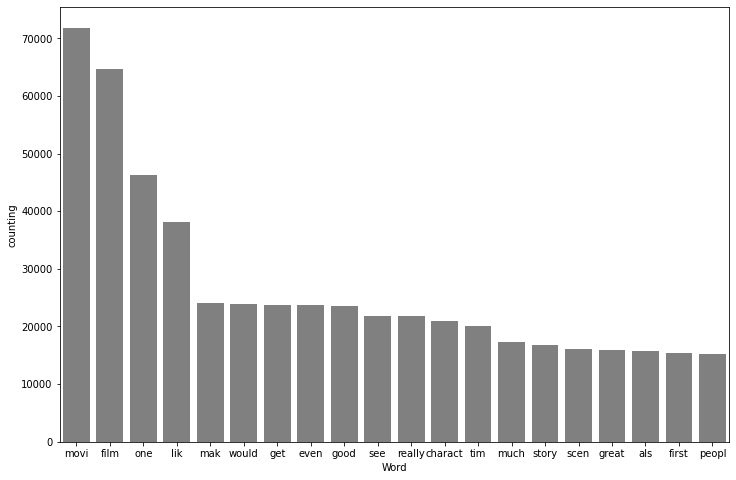

In [30]:
barplott(df, 'processed_1', 30)

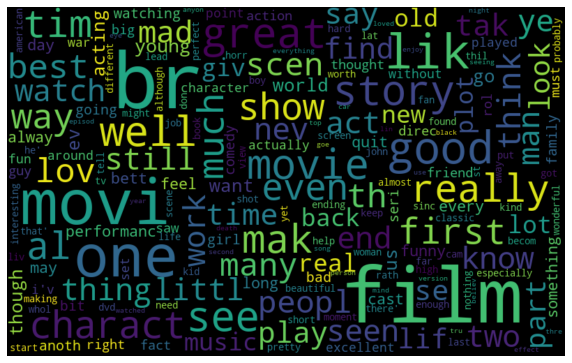

In [31]:
positive_word_clouds(df, "processed_1")

# TF-IDF and Ngrams


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

test = ['I watched a great movie yesterday', 'I watched a terrible movie yesterday']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristic = tfidf.fit_transform(test)
pd.DataFrame(
    caracteristic.todense(),
    columns=tfidf.get_feature_names()
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,great,movie,terrible,watched,yesterday
0,0.630099,0.448321,0.000000,0.448321,0.448321
1,0.000000,0.448321,0.630099,0.448321,0.448321


In [33]:
from pandas.core.common import random_state
tfidf = TfidfVectorizer(lowercase=False)
vector_tfidf = tfidf.fit_transform(df['processed_1'])
train, test, train_class, test_class = train_test_split(vector_tfidf,
                                                   df['processed_1'],
                                                   random_state= 40)